In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [241]:
def filtering(img_path, kernel, strides=1, padding='same', verbose=False):

    """
    This function will take an image, a kernel as input and return the image which is filtered by the kernel.
    The kernel should be in square size, for example (3,3), (5,5), (7,7), (9,9)....

    strides is the how much you want to slide your kernel through the image. This function only work with strides = 1 at the moment

    padding is how you want to output to be. If padding = 'same', then the output image will be the same size as the input. 
    """

    # read image
    image = Image.open(img_path,mode='r')
    image = np.asarray(image)
    print("Image Shape : {}".format(image.shape))
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image)
        plt.title("Image")
        plt.show()

 
    image_row, image_col,image_cha = image.shape
    kernel_row, kernel_col = kernel.shape

    # compute how to pad the image correctly
    if padding == 'same':
        out_height = int(np.ceil(float(image_row) / float(strides)))
        out_width  = int(np.ceil(float(image_col) / float(strides)))
    elif padding == 'valid':
        out_height = int(np.ceil(float(image_row - kernel_row + 1) / float(strides)))
        out_width  = int(np.ceil(float(image_col - kernel_col + 1) / float(strides)))
    pad_along_height = max((out_height - 1) * strides +
                    kernel_row - image_row, 0)
    pad_along_width = max((out_width - 1) * strides +
                    kernel_col - image_col, 0)
    pad_top = int(pad_along_height // 2)
    pad_bottom = int(pad_along_height - pad_top)
    pad_left = int(pad_along_width // 2)
    pad_right = int(pad_along_width - pad_left)
 
    # reshape image so that we can iterate it easily
    img = image.transpose(2,0,1).reshape(image_cha,image_row,image_col) 
    
    #create a empty numpy array to store padded image
    padded_image = np.ndarray((image_cha ,(image_row +(pad_top+pad_bottom)), 
                            (image_col +(pad_left+pad_right)) ),np.int) 

    # pad image for each channel
    for i,x in enumerate(img):   
        x_p = np.pad(x,((pad_top,pad_bottom), (pad_left,pad_right)),'constant')
        padded_image[i,:,:] = x_p

    # transpose back original image
    padded_image = np.uint8(padded_image).transpose(1,2,0)  
    
    if verbose:
        print("padded Image Shape : {}".format(padded_image.shape))
        plt.imshow(padded_image)
        plt.title("Padded Image")
        plt.show()

    # create an output to store the result
    output = np.zeros((out_height, out_width, image_cha))
    for channel in range(image_cha): 
        for row in range(image_row):
            for col in range(image_col):
                output[row, col, channel] = (1/(kernel_row * kernel_col)) *np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col, channel])

 
    # retrieve img from numpy array
    print("Output Image size : {}".format(output.shape))
    output= Image.fromarray(np.array(np.uint8(output)))  

    
    if verbose:
        plt.imshow((output))
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return (output)

In [212]:
# implement 2D- gaussian filter

# using Univariate Normal Distribution formula
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 
 
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
 
    return kernel_2D

In [213]:
def create_kernel(size):
    return np.ones((size,size))

Image Shape : (512, 512, 3)
Kernel Shape : (3, 3)


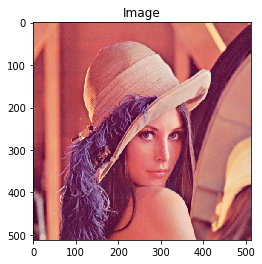

padded Image Shape : (514, 514, 3)


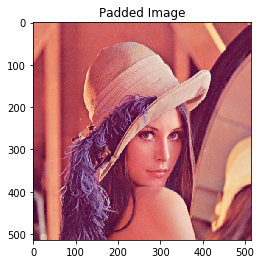

Output Image size : (512, 512, 3)


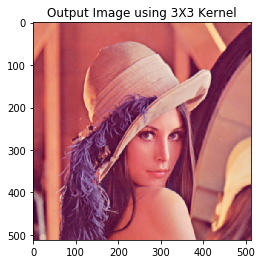

In [235]:
 pm = filtering("C:/Users/vmphu/OneDrive/Desktop/uni/first sem/computer vision/labImg/lena.png", create_kernel(3), verbose=True)

Image Shape : (512, 512, 3)
Kernel Shape : (5, 5)


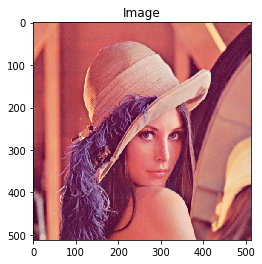

padded Image Shape : (516, 516, 3)


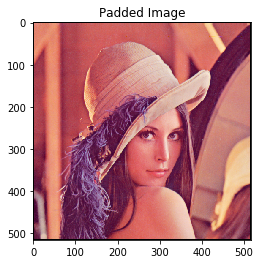

Output Image size : (512, 512, 3)


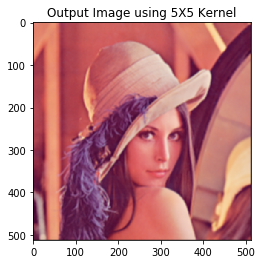

In [236]:
 pm = filtering("C:/Users/vmphu/OneDrive/Desktop/uni/first sem/computer vision/labImg/lena.png", create_kernel(5), verbose=True)

Image Shape : (512, 512, 3)
Kernel Shape : (3, 3)


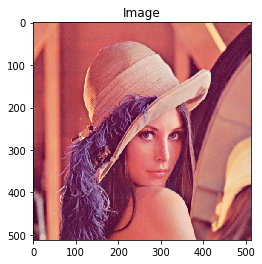

padded Image Shape : (514, 514, 3)


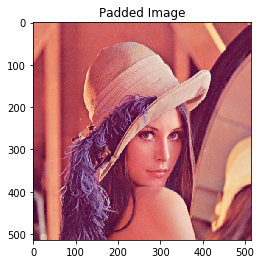

Output Image size : (512, 512, 3)


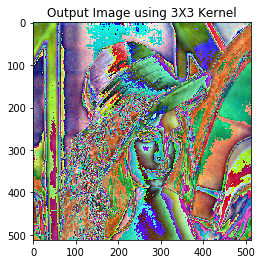

In [242]:
con_filter = [[ 0.25, 0.5, 0.25], [ 0.5 , 1, 0.5], [0.25, 0.5, 0.25]]
con_filter_flip=np.flip(con_filter2)
pm = filtering("C:/Users/vmphu/OneDrive/Desktop/uni/first sem/computer vision/labImg/lena.png", con_filter_flip, verbose=True)


Image Shape : (512, 512, 3)
Kernel Shape : (7, 7)


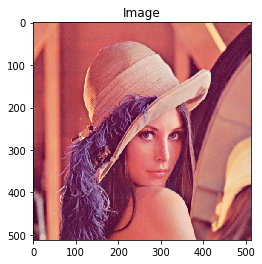

padded Image Shape : (518, 518, 3)


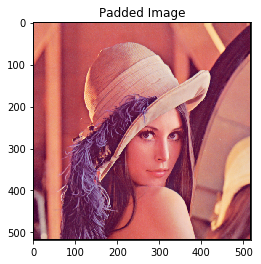

Output Image size : (512, 512, 3)


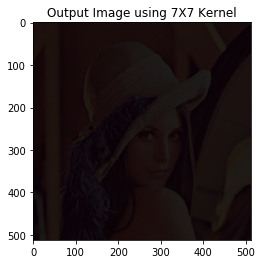

In [238]:
 pm = filtering("C:/Users/vmphu/OneDrive/Desktop/uni/first sem/computer vision/labImg/lena.png", gaussian_kernel(7), verbose=True)